In [7]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Generate Synthetic Dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=2, random_state=42)

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Task-Specific Models
base_models = [DecisionTreeClassifier(random_state=seed) for seed in range(5)]
for model in base_models:
    model.fit(X_train, y_train)

# Step 5: Create Meta-Model using RandomForestClassifier
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Extract base models' predictions on the validation set
base_models_predictions = np.array([model.predict(X_test) for model in base_models]).T

# Step 6: Train Meta-Model on Base Models' Predictions
meta_model.fit(base_models_predictions, y_test)

# Step 7: Evaluate Meta-Model on Real Datasets
meta_model_predictions = meta_model.predict(base_models_predictions)

# Evaluate accuracy
accuracy = accuracy_score(y_test, meta_model_predictions)
print(f"Meta-Model Accuracy: {accuracy:.2f}")



Meta-Model Accuracy: 0.85


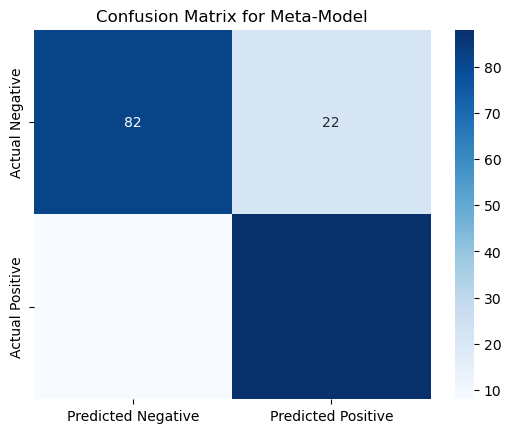

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, meta_model_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Meta-Model')
plt.show()


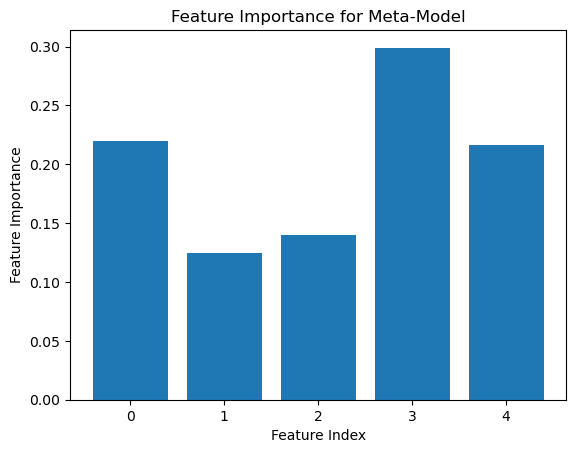

In [9]:
if hasattr(meta_model, 'feature_importances_'):
    feature_importance = meta_model.feature_importances_
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Feature Importance for Meta-Model')
    plt.show()


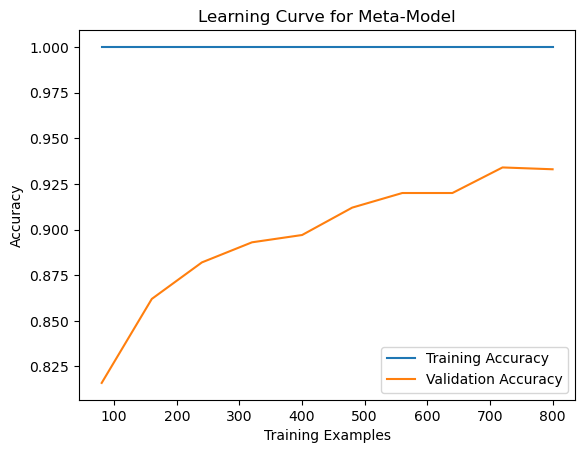

In [10]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve for Meta-Model')
    plt.legend()
    plt.show()

plot_learning_curve(meta_model, X, y)


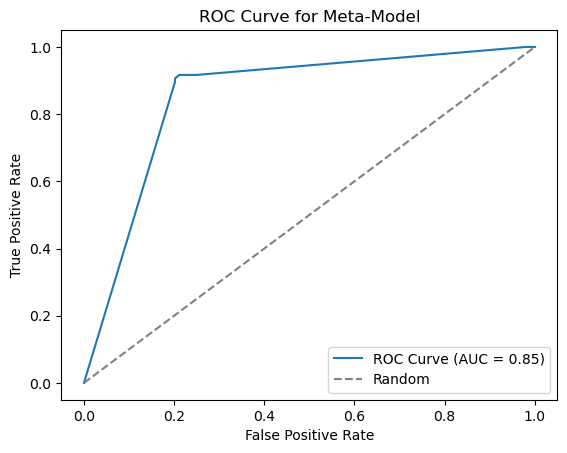

In [11]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, meta_model.predict_proba(base_models_predictions)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Meta-Model')
plt.legend()
plt.show()


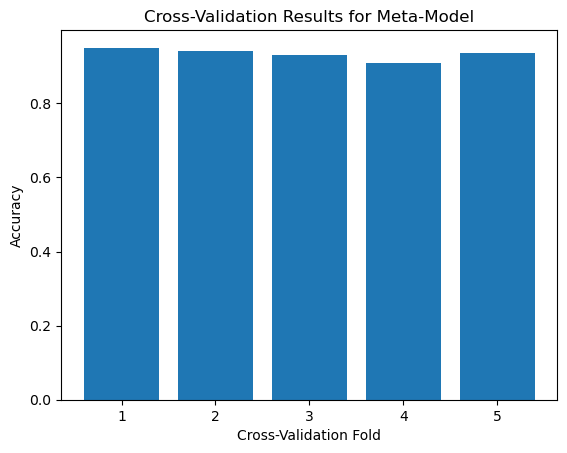

In [12]:
from sklearn.model_selection import cross_val_score

def plot_cross_val_results(model, X, y):
    cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    plt.bar(range(1, len(cv_results) + 1), cv_results)
    plt.xlabel('Cross-Validation Fold')
    plt.ylabel('Accuracy')
    plt.title('Cross-Validation Results for Meta-Model')
    plt.show()

plot_cross_val_results(meta_model, X, y)


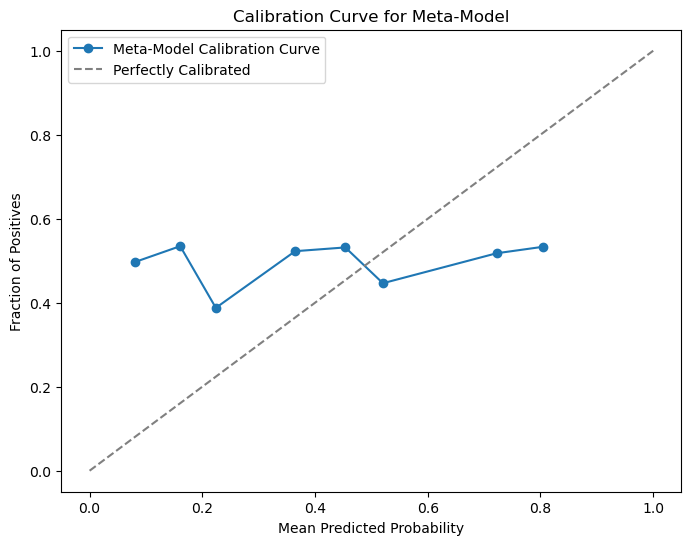

In [22]:
from sklearn.datasets import make_classification
from sklearn.calibration import calibration_curve

def plot_calibration_curve(model, X, y):
    plt.figure(figsize=(8, 6))

    # Generate a calibration dataset with the same number of samples as the original dataset
    X_calibrate, _ = make_classification(n_samples=len(X), n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_clusters_per_class=2, random_state=42)

    # Convert y to integer type
    y = y.astype(int)

    prob_true, prob_pred = calibration_curve(y, model.predict_proba(X_calibrate)[:, 1], n_bins=10)

    plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Meta-Model Calibration Curve')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Curve for Meta-Model')
    plt.legend()
    plt.show()

# Generate a calibration dataset with the same number of samples as the original dataset
plot_calibration_curve(meta_model, X, y)
